## Decision Trees and Random Forests

### 1a
Get your first DT Classifier running

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
cancer = load_breast_cancer()
# if you don't remember how the dataset is structurd
print("cancer.keys(): {}".format(cancer.keys()))
# if you want to see the number of samples and attributes
print("Shape of cancer data: {}".format(cancer.data.shape))


cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)


In [3]:
# Convert data and target to pandas DataFrames
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target_df = pd.DataFrame(cancer.target, columns=['target'])

# Combine data and target into a single DataFrame (optional)
df = pd.concat([data_df, target_df], axis=1)

# Print the first few rows of the data
print(df.head())

# Get summary statistics for numerical features
print(df.describe())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
# and here you can produce a brief statistics for each class, malignant and benign.
# IMPORTANT BELOW: note that the space produced is an automatic indentation - don't force it.
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [5]:
# Should you want to view the features by name:
print("Feature names:\n{}".format(cancer.feature_names))


Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# loading dataset
cancer = load_breast_cancer()

#random_state: did Phoebe P. find it out? Right, just to unify the random split.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#the classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [7]:
#printing training and test results
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [8]:
# a) Explain the printed array
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [9]:
def sort_dictionary_by_value(dictionary):
    """Sorts a dictionary by value from greatest to least.

    Args:
        dictionary: The dictionary to be sorted.

    Returns:
        A new dictionary with the same keys and values, sorted by value in descending order.
    """

    sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

# Example usage:
importance_dic = {}
for key, value in zip(cancer.feature_names, tree.feature_importances_):
    importance_dic[str(key)] = float(value)

sorted_importance_dic = sort_dictionary_by_value(importance_dic)

for key, value in sorted_importance_dic.items():
    print(f"{key}: {value}")

worst radius: 0.6954632181471274
worst concave points: 0.11684357098550442
worst texture: 0.05383210641368679
texture error: 0.04630969310672634
worst concavity: 0.01740311870869308
worst area: 0.013546745813016745
worst symmetry: 0.011372576731915298
radius error: 0.009757314709226458
mean smoothness: 0.009031163875344502
mean texture: 0.007525969896120416
mean concavity: 0.007525969896120416
fractal dimension error: 0.006689751018773702
area error: 0.0023874473180847578
smoothness error: 0.002311353379659695
mean radius: 0.0
mean perimeter: 0.0
mean area: 0.0
mean compactness: 0.0
mean concave points: 0.0
mean symmetry: 0.0
mean fractal dimension: 0.0
perimeter error: 0.0
compactness error: 0.0
concavity error: 0.0
concave points error: 0.0
symmetry error: 0.0
worst perimeter: 0.0
worst smoothness: 0.0
worst compactness: 0.0
worst fractal dimension: 0.0


The array showed the value of importance for the features for making predictions with scores normalized to add up to 1

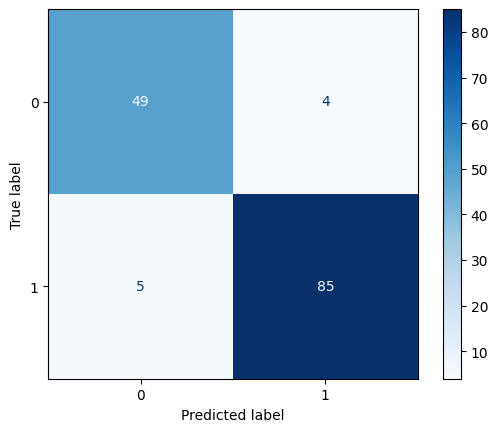

In [17]:
# b) Produce the confusion matrix for the classifier
# Make predictions
y_pred = tree.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tree.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

c) Can you use another classifier to do the job? BN or KNN? Apply either or both to the same
dataset and analyse results. 

KNN below, had slighter better results with optimal choice

In [26]:
X = cancer.data
feature_names = cancer.feature_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

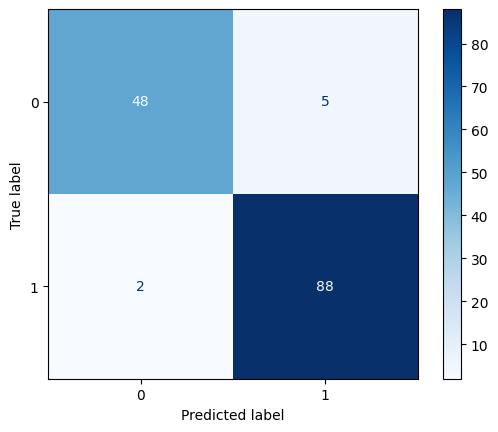

In [27]:
y_pred = knn.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()